In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=15,10

In [24]:
url  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto20/NumeroVentiladores_T.csv"
data = pd.read_csv(url)

In [25]:
data = data.rename(columns={"Ventiladores": "fecha"}) #Le cambiamos el nombre a la columna
data.head()

,fecha,total,disponibles,ocupados
0,2020-04-14,1550,564,986
1,2020-04-15,1563,577,986
2,2020-04-16,1582,569,1013
3,2020-04-17,1604,579,1025
4,2020-04-18,1627,588,1039


## Cantidad de ventiladores totales, disponibles, ocupados

In [26]:
restantes = data["total"] - data["ocupados"]
restantes

0    564
1    577
2    569
3    579
4    588
5    570
dtype: int64

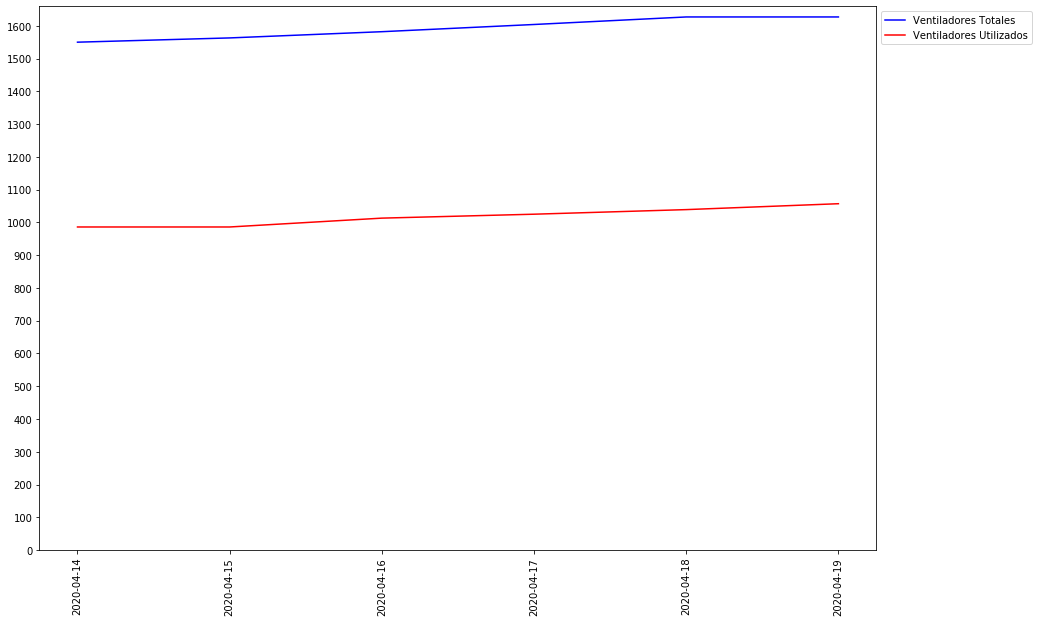

In [35]:
plt.plot(data["fecha"],data["total"], 'b')    ##Ventiladores totales
plt.plot(data["fecha"],data["ocupados"], 'r') ##Ventiladores ocupados

plt.legend(['Ventiladores Totales','Ventiladores Utilizados'], loc = 'best', bbox_to_anchor=(1.0, 1.0))
plt.xticks(data["fecha"], rotation='vertical')
plt.yticks(np.arange(0, max(data["total"])+1, 100))
plt.show()